## Logistics Regression

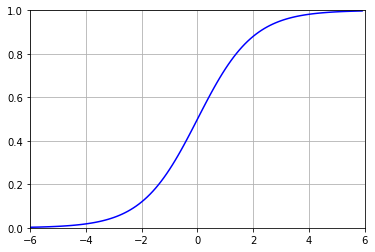

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.axis([-6, 6, 0, 1])
plt.grid(True)
X = np.arange(-6,6,0.1)
y = 1 / (1 + np.e ** (-X))
plt.plot(X, y, 'b')
plt.show()

In [13]:
import pandas as pd

In [14]:
import seaborn as sns

In [18]:
import xlrd

In [19]:
data = pd.read_excel('examples/chapter5/demo/data/bankloan.xls')

In [20]:
data

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
5,41,2,5,5,25,10.2,0.392700,2.157300,0
6,39,1,20,9,67,30.6,3.833874,16.668126,0
7,43,1,12,11,38,3.6,0.128592,1.239408,0
8,24,1,3,4,19,24.4,1.358348,3.277652,1
9,36,1,0,13,25,19.7,2.777700,2.147300,0


In [21]:
data.describe()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987568,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
年龄,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
教育,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
工龄,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
地址,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
收入,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
负债率,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
信用卡负债,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
其他负债,700.0,3.058209,3.287555,0.045584,1.044178,1.987568,3.923065,27.03360
违约,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [25]:
data1 = data['负债率'].dropna()

In [26]:
data1

0       9.3
1      17.3
2       5.5
3       2.9
4      17.3
5      10.2
6      30.6
7       3.6
8      24.4
9      19.7
10      1.7
11      5.2
12     10.0
13     16.3
14      9.1
15      8.6
16     16.4
17      7.6
18      5.7
19      1.7
20      3.2
21      5.6
22     10.0
23      9.8
24     18.0
25     17.6
26      6.7
27     16.7
28     18.4
29     14.2
       ... 
670     6.3
671    12.8
672     1.2
673    11.1
674     3.7
675     6.4
676    11.8
677     2.1
678     9.3
679     3.0
680    25.4
681     9.7
682    11.5
683     6.3
684    10.5
685    16.1
686     7.9
687    10.3
688    10.8
689    10.7
690     7.3
691     7.2
692    28.9
693     4.7
694    12.1
695     4.6
696    11.5
697     7.6
698     8.4
699    14.7
Name: 负债率, Length: 700, dtype: float64

f:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


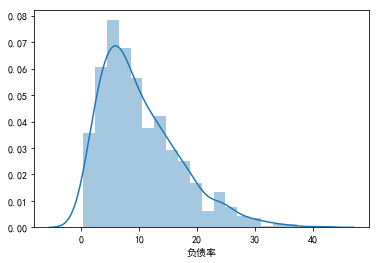

In [29]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(data1)

{'whiskers': [<matplotlib.lines.Line2D at 0xd635fb0>,
 'caps': [<matplotlib.lines.Line2D at 0xd63f450>,
 'boxes': [<matplotlib.lines.Line2D at 0xd635d30>],
 'medians': [<matplotlib.lines.Line2D at 0xd63f9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd63fbf0>],
 'means': []}

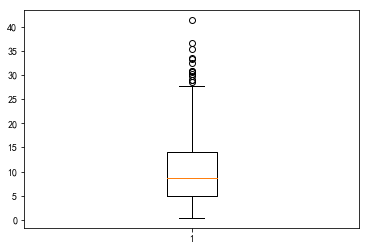

In [33]:
plt.boxplot(data1)

In [34]:
x = data.iloc[:,:8].as_matrix()

In [35]:
y = data.iloc[:,8].as_matrix()

In [53]:
from sklearn.linear_model import LogisticRegression as LR

In [54]:
from sklearn.linear_model import RandomizedLogisticRegression as RLR

In [55]:
rlr = RLR(selection_threshold=0.25)

In [59]:
rlr.fit(x, y)

RandomizedLogisticRegression(C=1, fit_intercept=True, memory=None, n_jobs=1,
               n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
               random_state=None, sample_fraction=0.75, scaling=0.5,
               selection_threshold=0.25, tol=0.001, verbose=False)

In [60]:
rlr.get_support()

array([False, False,  True,  True, False,  True,  True, False])

In [84]:
print('有效特征为：', ', '.join(data.columns[0:8][rlr.get_support()]))

有效特征为： 工龄, 地址, 负债率, 信用卡负债


In [88]:
x = data[data.columns[:8][rlr.get_support()]].as_matrix()

In [89]:
x

array([[17.      , 12.      ,  9.3     , 11.359392],
       [10.      ,  6.      , 17.3     ,  1.362202],
       [15.      , 14.      ,  5.5     ,  0.856075],
       ...,
       [15.      ,  3.      ,  7.6     ,  0.491264],
       [19.      , 22.      ,  8.4     ,  2.302608],
       [12.      , 14.      , 14.7     ,  2.994684]])

In [85]:
lr = LR()

In [90]:
lr.fit(x, y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
print('模型的平均准确率: ' , format(lr.score(x, y), '.2%'))

模型的平均准确率:  81.43%


用测试集预测

filename1 = ‘E:/destop/text/te.xls’
te = pd.read_excel(filename1)

xte =te.iloc[:, :8].as_matrix()

yte= te.iloc[:, 8].as_matrix()

#筛选特征

xte1 = te[te.columns[rlr.get_support()]].as_matrix()

#预测

pte=lr.predict(xte1)

Print pte

In [115]:
te = pd.read_excel('examples/chapter5/demo/data/bankloan.xls')

In [117]:
xte =te.iloc[:, :8].as_matrix()

yte= te.iloc[:, 8].as_matrix()

#筛选特征
xte1 = te[te.columns[:8][rlr.get_support()]].as_matrix()

In [119]:
pte = lr.predict(xte1)

In [120]:
pte

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### 二元分类效果评估方法

[[478  39]
 [ 91  92]]


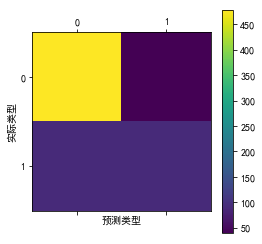

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
confusion_matrix = confusion_matrix(yte,pte)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.colorbar()
plt.ylabel('实际类型')
plt.xlabel('预测类型')
plt.show()

### 精确率和召回率

In [133]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

precisions = cross_val_score(lr,xte1,yte, cv=5, scoring='precision')
print('精确率：', np.mean(precisions), precisions)
recalls = cross_val_score(lr,xte1,yte, cv=5, scoring='recall')
print('召回率：', np.mean(recalls), recalls)

精确率： 0.7065201465201465 [0.64285714 0.7        0.76666667 0.69230769 0.73076923]
召回率： 0.5028528528528529 [0.48648649 0.37837838 0.62162162 0.5        0.52777778]


In [134]:
#### 我们的分类器精确率 70.7%，分类器预测出的违约客户中70.7%都是真的违约。召回率比较低50.3%，
#### 就是说真实的违约客户中，49.7%被当作正常客户了，没有被识别出来。这些数据会不断变化，因为训练集和测试集是随机抽取的。

### 计算综合评价指标

In [135]:
f1s = cross_val_score(lr,xte1,yte, cv=5)
print('综合评价指标：', np.mean(f1s), f1s)

综合评价指标： 0.8157880504107353 [0.79432624 0.79432624 0.85       0.81294964 0.82733813]


本例的综合评价指标是76%

### ROC AUC

ROC曲线（Receiver Operating Characteristic，ROC curve）可以用来可视化分类器的效果。和准确率不同，ROC曲线对分类比例不平衡的数据集不敏感，ROC曲线显示的是对超过限定阈值的所有预测结果的分类器效果。ROC曲线画的是分类器的召回率与误警率（fall-out）的曲线。误警率也称假阳性率，是所有阴性样本中分类器识别为阳性的样本所占比例：

AUC是ROC曲线下方的面积，它把ROC曲线变成一个值，表示分类器随机预测的效果。scikit-learn提供了计算ROC和AUC指标的函数

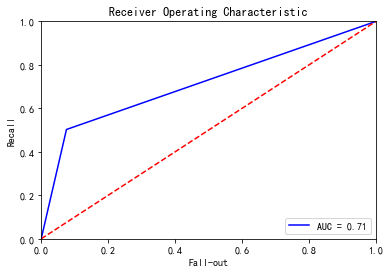

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(yte,pte)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

## Decision Tree

In [1]:
import pandas as pd

In [4]:
data = pd.read_excel('examples/chapter5/demo/data/sales_data.xls', index_col='序号')

In [5]:
data

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高
6,坏,否,是,高
7,坏,是,否,高
8,好,是,是,高
9,好,是,否,高


In [9]:
data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1

In [10]:
data

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1
6,-1,-1,1,1
7,-1,1,-1,1
8,1,1,1,1
9,1,1,-1,1


In [22]:
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

In [13]:
from sklearn.tree import  DecisionTreeClassifier as DTC
dtc = DTC(criterion = 'entropy')   #建立决策树模型，基于信息熵
dtc.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
# 导入相关函数，可视化决策树。
# 导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
x = pd.DataFrame(x)
with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = x.columns, out_file = f)

In [44]:
import graphviz as gv

...

## 人工神经网络

In [56]:
#-*- coding: utf-8 -*-
#使用神经网络算法预测销量高低

import pandas as pd

#参数初始化
inputfile = 'examples/chapter5/demo/data/sales_data.xls'
data = pd.read_excel(inputfile, index_col = u'序号') #导入数据

#数据是类别标签，要将它转换为数据
#用1来表示“好”、“是”、“高”这三个属性，用0来表示“坏”、“否”、“低”
data[data == u'好'] = 1
data[data == u'是'] = 1
data[data == u'高'] = 1
data[data != 1] = 0
x = data.iloc[:,:3].as_matrix().astype(int)kerasimport
y = data.iloc[:,3].as_matrix().astype(int)

from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(3, 10))
model.add(Activation('relu')) #用relu函数作为激活函数，能够大幅提供准确度
model.add(Dense(10, 1))
model.add(Activation('sigmoid')) #由于是0-1输出，用sigmoid函数作为激活函数

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              class_mode='binary')
#编译模型。由于我们做的是二元分类，所以我们指定损失函数为binary_crossentropy，以及模式为binary
#另外常见的损失函数还有mean_squared_error、categorical_crossentropy等，请阅读帮助文件。
#求解方法我们指定用adam，还有sgd、rmsprop等可选

model.fit(x, y, nb_epoch = 1000, batch_size = 10) #训练模型，学习一千次
yp = model.predict_classes(x).reshape(len(y)) #分类预测

from cm_plot import * #导入自行编写的混淆矩阵可视化函数
cm_plot(y, yp).show() #显示混淆矩阵可视化结果

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

## K-Means 聚类算法

In [1]:
import pandas as pd

# 参数初始化
inputfile = 'examples/chapter5/demo/data/consumption_data.xls' #销量及其他属性数据
outputfile = 'data_type.xls'
k = 3 #聚类的类别
iteration = 500 #聚类最大循环次数
data = pd.read_excel(inputfile, index_col = 'Id')

In [3]:
data_zs = 1.0*(data-data.mean())/data.std() #数据标准化

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分类为k类，并发数4
model.fit(data_zs) #开始聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
# 简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = data.columns.tolist() + ['类别数目']

In [20]:
r

,R,F,M,类别数目
0,-0.162951,1.116722,0.395575,340
1,3.455055,-0.295654,0.449123,40
2,-0.147855,-0.656892,-0.272251,560


In [21]:
#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1) #详细输出每个样本对应的类别
r.columns = list(data.columns) + ['聚类类别'] #重命名表头

In [28]:
r.to_excel(outputfile) #保存结果
r

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,2
2,3,5,1507.11,2
3,4,16,817.62,0
4,3,11,232.81,2
5,14,7,1913.05,2
6,19,6,220.07,2
7,5,2,615.83,2
8,26,2,1059.66,2
9,21,9,304.82,2


### 绘制聚类后的概率密度图

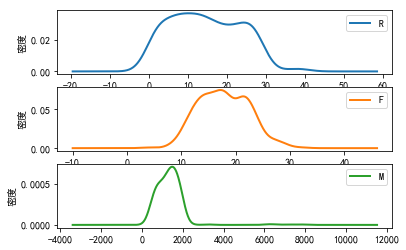

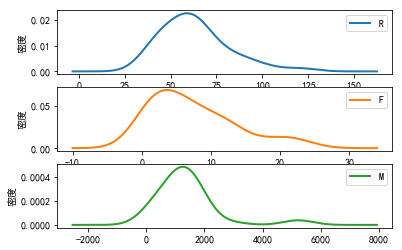

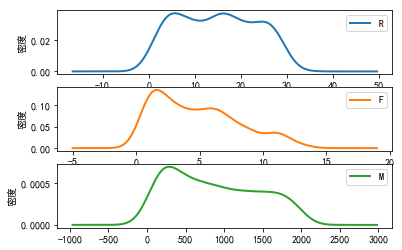

In [34]:
def density_plot(data, title): #自定义作图函数
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    plt.figure()
    for i in range(len(data.iloc[0])): #逐列作图
        (data.iloc[:,i]).plot(kind = 'kde', label= data.columns[i], linewidth=2)
    plt.ylabel('密度')
    plt.xlabel('人数')
    plt.title('聚类类别%s各属性的密度曲线' %title)
    plt.legend()
    return plt

def density_plot(data): #自定义作图函数
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    p = data.plot(kind='kde', linewidth =2, subplots = True, sharex = False)
    [p[i].set_ylabel('密度') for i in range(k)]
    plt.legend()
    return plt

pic_output = 'pd_' #概率密度图文件名前缀
for i in range(k):
    density_plot(data[r['聚类类别']==i]).savefig('%s%s.png' %(pic_output, i))

分群1特点：R间隔相对较小，主要集中再0~30天；消费次数集中在10~25次；消费金额再500~2000.
分群2特点：R间隔相对较大，间隔分布在30~80天；消费次数集中在0~15次；消费金额在0~2000.
分群3特点：R间隔分布在0~30天；消费次数集中在0~12次；消费金额在0~1800.

对比分析：分群1时间间隔较短，消费次数多，而且消费金额较大，是高消费、高价值人群。
分群2的时间间隔较长，消费次数少，消费金额也不是特别高，是价值较低的客户群体。
分群3的时间间隔、消费次数和消费金额处于中等水平，代表着一般客户。

### 用TSNE进行数据降维并展示聚类结果

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit_transform(data_zs) #进行数据降维
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index) #转换数据格式

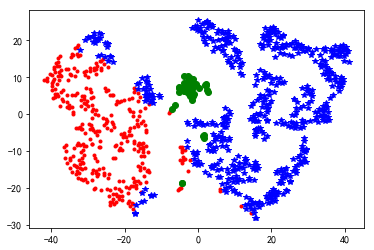

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# 不同类别用不同颜色和样本绘图
d = tsne[r['聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r['聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r['聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()

## 关联规则 Apriori算法

In [3]:
#-*- coding: utf-8 -*-
from __future__ import print_function
import pandas as pd

#自定义连接函数，用于实现L_{k-1}到C_k的连接
def connect_string(x, ms):
  x = list(map(lambda i:sorted(i.split(ms)), x))
  l = len(x[0])
  r = []
  for i in range(len(x)):
    for j in range(i,len(x)):
      if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
        r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
  return r

#寻找关联规则的函数
def find_rule(d, support, confidence, ms = u'--'):
  result = pd.DataFrame(index=['support', 'confidence']) #定义输出结果
  
  support_series = 1.0*d.sum()/len(d) #支持度序列
  column = list(support_series[support_series > support].index) #初步根据支持度筛选
  k = 0
  
  while len(column) > 1:
    k = k+1
    print(u'\n正在进行第%s次搜索...' %k)
    column = connect_string(column, ms)
    print(u'数目：%s...' %len(column))
    sf = lambda i: d[i].prod(axis=1, numeric_only = True) #新一批支持度的计算函数
    
    #创建连接数据，这一步耗时、耗内存最严重。当数据集较大时，可以考虑并行运算优化。
    d_2 = pd.DataFrame(list(map(sf,column)), index = [ms.join(i) for i in column]).T
    
    support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d) #计算连接后的支持度
    column = list(support_series_2[support_series_2 > support].index) #新一轮支持度筛选
    support_series = support_series.append(support_series_2)
    column2 = []
    
    for i in column: #遍历可能的推理，如{A,B,C}究竟是A+B-->C还是B+C-->A还是C+A-->B？
      i = i.split(ms)
      for j in range(len(i)):
        column2.append(i[:j]+i[j+1:]+i[j:j+1])
    
    cofidence_series = pd.Series(index=[ms.join(i) for i in column2]) #定义置信度序列
 
    for i in column2: #计算置信度序列
      cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]
    
    for i in cofidence_series[cofidence_series > confidence].index: #置信度筛选
      result[i] = 0.0
      result[i]['confidence'] = cofidence_series[i]
      result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]
  
  result = result.T.sort_values(['confidence','support'], ascending = False) #结果整理，输出
  print(u'\n结果为：')
  print(result)
  
  return result

In [5]:
inputfile = 'examples/chapter5/demo/data/menu_orders.xls'
outputfile = 'tmp/apriori_rules.xls' #结果文件
data = pd.read_excel(inputfile, header=None)

print('\n转换原始数据至0-1矩阵...')
ct = lambda x : pd.Series(1, index=x[pd.notnull(x)]) #转换0-1矩阵的过度函数
b = map(ct, data.as_matrix()) #用map方式执行
data = pd.DataFrame(list(b)).fillna(0) #实现矩阵转换，空值用0填充
print('\n转换完毕。')
del b #删除中间变量b，节省内存

support = 0.2 #最小支持度
confidence = 0.5 #最小置信度
ms = '---' #连接符，默认‘--’，用来区分不同元素，如A--B。需要保证原始表格中不含有该字符
find_rule(data, support, confidence, ms).to_excel(outputfile) #保存结果


转换原始数据至0-1矩阵...

转换完毕。

正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
a---b          0.5    0.714286
c---a          0.5    0.714286
a---c          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c      0.3    0.600000
a---c---e      0.3    0.600000


## 时序模式